# Wind Study Toulouse

## 1 - Preliminary work

### 1.1 - Import packages and load data

In [1]:
#importation des packages

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import random

In [2]:
#Choix des options

#Lien pour les données
#data_path=""
#data_path="Données/"
data_path="../Données/"

In [3]:
from utility_tools import regroupement_data
from utility_tools import regroupement_data_all

data_hToulouse_wind,data_dToulouse_wind=regroupement_data(data_path+'Data_Toulouse/Wind/',1980,2022,data_type="wind")
data_hToulouse_weather,data_dToulouse_weather=regroupement_data(data_path+'Data_Toulouse/Weather/',2000,2022,data_type="weather")

#Test de la fonction
#Test,test2=regroupement_data_all(data_path+'Data_Toulouse/',[1980,1980,2000],[2023,2023,2023])

Toutes les données sont différentes
Toutes les données sont différentes


### 1.2 - Tendency and Seasonnality study

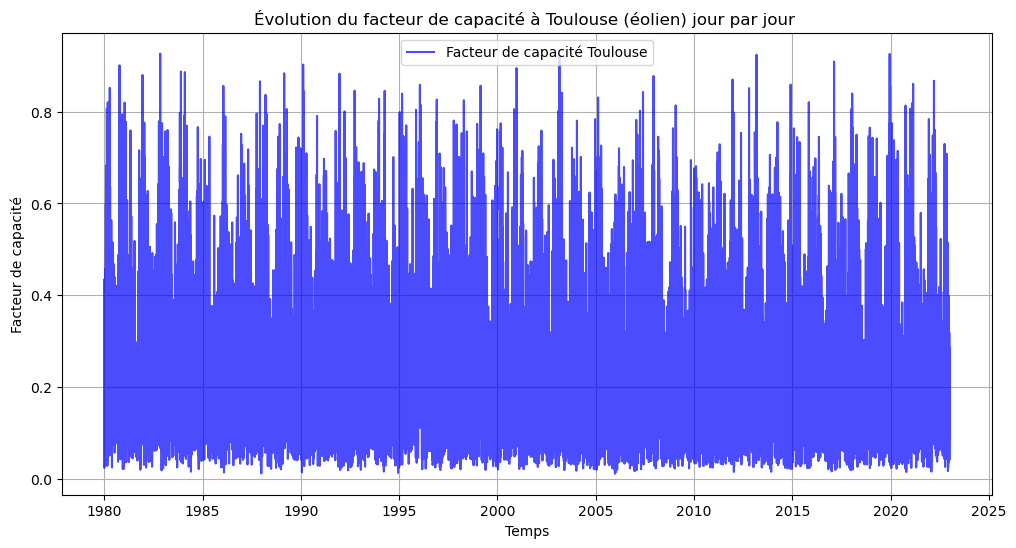

In [4]:
# Création du graphique de série temporelle pour la capacité
plt.figure(figsize=(12, 6))
plt.plot(data_dToulouse_wind.index, data_dToulouse_wind['electricity'], label='Facteur de capacité Toulouse', color='blue', alpha=0.7)
plt.title('Évolution du facteur de capacité à Toulouse (éolien) jour par jour ')
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Calcul de la tendance et de la saisonnalité

from methodes_etude_serie import Etude_Tendance_Saisonnalite_annuelle

#Ajouter étude plus approfondie tendance

tendency_Toulouse_wind,seasonnality_Toulouse_wind1=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_wind, methode_tend='mean',methode_saison='mobile1_d')
tendency_Toulouse_wind,seasonnality_Toulouse_wind7=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_wind, methode_tend='mean',methode_saison='mobile7_d')
tendency_Toulouse_wind,seasonnality_Toulouse_wind14=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_wind, methode_tend='mean',methode_saison='mobile14_d')
tendency_Toulouse_wind,seasonnality_Toulouse_wind28=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_wind, methode_tend='mean',methode_saison='mobile28_d')

Tendance à Toulouse :  0.22975704879239356


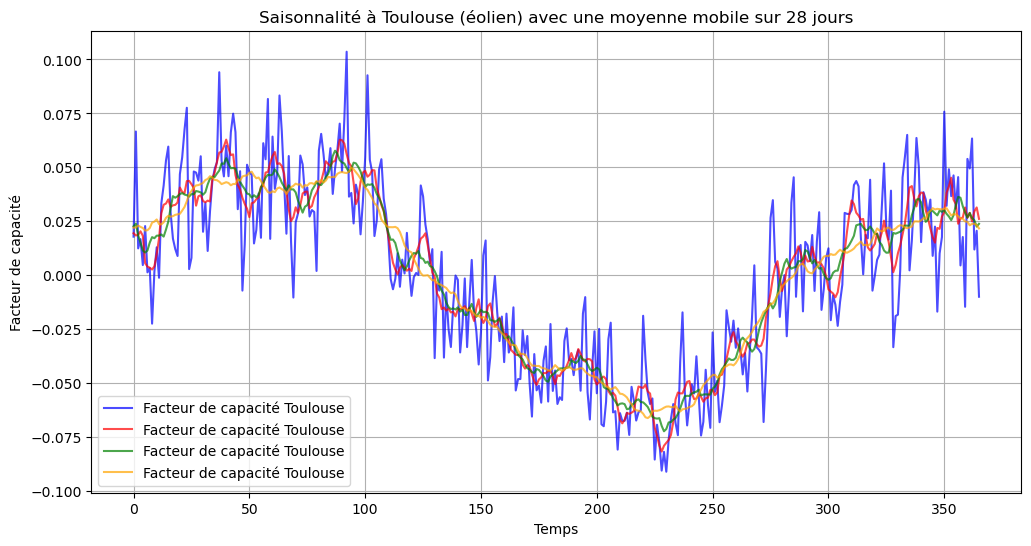

In [6]:
# Affichage de la tendance et de la saisonnalité

print("Tendance à Toulouse : ",tendency_Toulouse_wind)

plt.figure(figsize=(12, 6))
plt.plot(np.arange(366),seasonnality_Toulouse_wind1, label='Facteur de capacité Toulouse', color='blue', alpha=0.7)
plt.plot(np.arange(366),seasonnality_Toulouse_wind7, label='Facteur de capacité Toulouse', color='red', alpha=0.7)
plt.plot(np.arange(366),seasonnality_Toulouse_wind14, label='Facteur de capacité Toulouse', color='green', alpha=0.7)
plt.plot(np.arange(366),seasonnality_Toulouse_wind28, label='Facteur de capacité Toulouse', color='orange', alpha=0.7)
plt.legend()
plt.title('Saisonnalité à Toulouse (éolien) avec une moyenne mobile sur 28 jours')
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.grid(True)

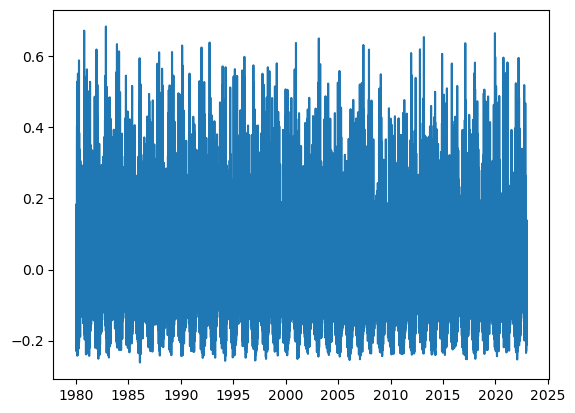

In [7]:
# Affichage des résidus

from methodes_etude_serie import Retrait_Tendance_Saisonnalite

data_stationnary = Retrait_Tendance_Saisonnalite(data_dToulouse_wind, tendency_Toulouse_wind, seasonnality_Toulouse_wind28)

plt.plot(data_stationnary['electricity'])

### 1-3 Seasonnality sinus approximation

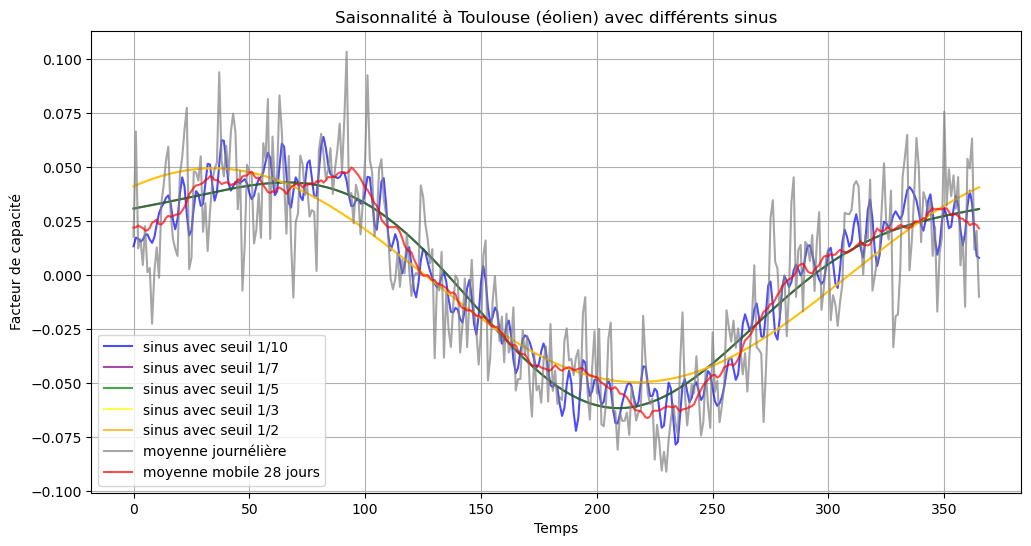

In [8]:
# Calcul de la tendance et de la saisonnalité estimé à l'aide du sinus interpolé sans moyenne mobile avec différents seuils

from methodes_etude_serie import Etude_Tendance_Saisonnalite_annuelle

tendency_Toulouse_wind,sinus1_t10_Toulouse_wind=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_wind, methode_tend='mean',methode_saison='sinus1_t10')
tendency_Toulouse_wind,sinus1_t7_Toulouse_wind=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_wind, methode_tend='mean',methode_saison='sinus1_t7')
tendency_Toulouse_wind,sinus1_t5_Toulouse_wind=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_wind, methode_tend='mean',methode_saison='sinus1_t5')
tendency_Toulouse_wind,sinus1_t3_Toulouse_wind=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_wind, methode_tend='mean',methode_saison='sinus1_t3')
tendency_Toulouse_wind,sinus1_t2_Toulouse_wind=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_wind, methode_tend='mean',methode_saison='sinus1_t2')
tendency_Toulouse_wind,mean_Toulouse_wind=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_wind, methode_tend='mean',methode_saison='mean')

plt.figure(figsize=(12, 6))
plt.plot(np.arange(366),sinus1_t10_Toulouse_wind, label='sinus avec seuil 1/10', color='blue', alpha=0.7)
plt.plot(np.arange(366),sinus1_t7_Toulouse_wind, label='sinus avec seuil 1/7', color='purple', alpha=0.7)
plt.plot(np.arange(366),sinus1_t5_Toulouse_wind, label='sinus avec seuil 1/5', color='green', alpha=0.7)
plt.plot(np.arange(366),sinus1_t3_Toulouse_wind, label='sinus avec seuil 1/3', color='yellow', alpha=0.7)
plt.plot(np.arange(366),sinus1_t2_Toulouse_wind, label='sinus avec seuil 1/2', color='orange', alpha=0.7)
plt.plot(np.arange(366),mean_Toulouse_wind, label='moyenne journélière', color='grey', alpha=0.7)
plt.plot(np.arange(366),seasonnality_Toulouse_wind28['electricity'], label='moyenne mobile 28 jours', color='red', alpha=0.7)
plt.title('Saisonnalité à Toulouse (éolien) avec différents sinus')
plt.legend()
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.grid(True)

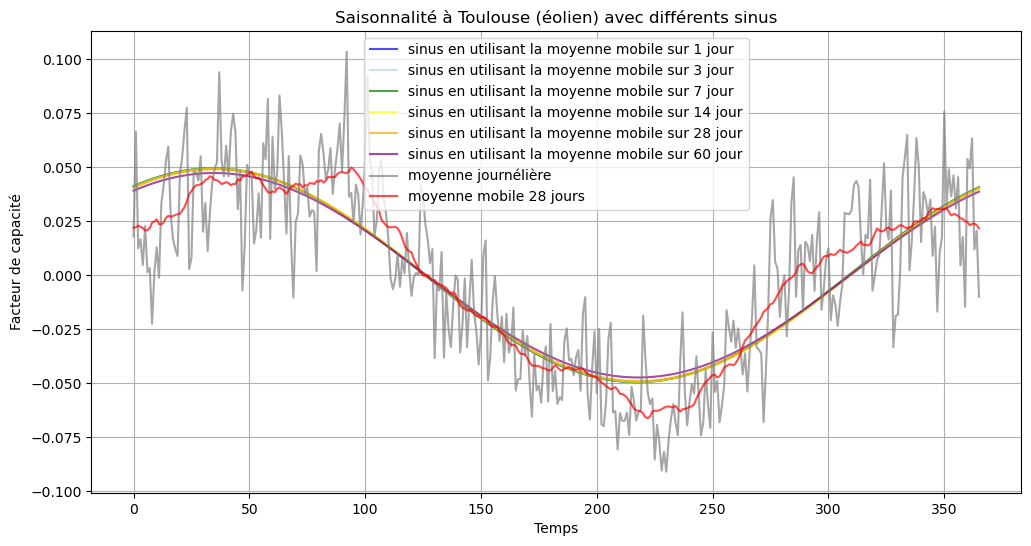

In [9]:
# Calcul de la tendance et de la saisonnalité estimé à l'aide du sinus interpolé avec différentes moyennes mobiles avec un seuil de 0.5

from methodes_etude_serie import Etude_Tendance_Saisonnalite_annuelle

tendency_Toulouse_wind,sinus1_t2_Toulouse_wind=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_wind, methode_tend='mean',methode_saison='sinus1_t2')
tendency_Toulouse_wind,sinus3_t2_Toulouse_wind=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_wind, methode_tend='mean',methode_saison='sinus3_t2')
tendency_Toulouse_wind,sinus7_t2_Toulouse_wind=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_wind, methode_tend='mean',methode_saison='sinus7_t2')
tendency_Toulouse_wind,sinus14_t2_Toulouse_wind=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_wind, methode_tend='mean',methode_saison='sinus14_t2')
tendency_Toulouse_wind,sinus28_t2_Toulouse_wind=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_wind, methode_tend='mean',methode_saison='sinus28_t2')
tendency_Toulouse_wind,sinus60_t2_Toulouse_wind=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_wind, methode_tend='mean',methode_saison='sinus60_t2')
tendency_Toulouse_wind,mean_Toulouse_wind=Etude_Tendance_Saisonnalite_annuelle(data_dToulouse_wind, methode_tend='mean',methode_saison='mean')

plt.figure(figsize=(12, 6))
plt.plot(np.arange(366),sinus1_t2_Toulouse_wind, label='sinus en utilisant la moyenne mobile sur 1 jour', color='blue', alpha=0.7)
plt.plot(np.arange(366),sinus3_t2_Toulouse_wind, label='sinus en utilisant la moyenne mobile sur 3 jour', color='lightblue', alpha=0.7)
plt.plot(np.arange(366),sinus7_t2_Toulouse_wind, label='sinus en utilisant la moyenne mobile sur 7 jour', color='green', alpha=0.7)
plt.plot(np.arange(366),sinus14_t2_Toulouse_wind, label='sinus en utilisant la moyenne mobile sur 14 jour', color='yellow', alpha=0.7)
plt.plot(np.arange(366),sinus28_t2_Toulouse_wind, label='sinus en utilisant la moyenne mobile sur 28 jour', color='orange', alpha=0.7)
plt.plot(np.arange(366),sinus60_t2_Toulouse_wind, label='sinus en utilisant la moyenne mobile sur 60 jour', color='purple', alpha=0.7)
plt.plot(np.arange(366),mean_Toulouse_wind, label='moyenne journélière', color='grey', alpha=0.7)
plt.plot(np.arange(366),seasonnality_Toulouse_wind28['electricity'], label='moyenne mobile 28 jours', color='red', alpha=0.7)
plt.title('Saisonnalité à Toulouse (éolien) avec différents sinus')
plt.legend()
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.grid(True)

## 1-4 Recherche meilleure méthode

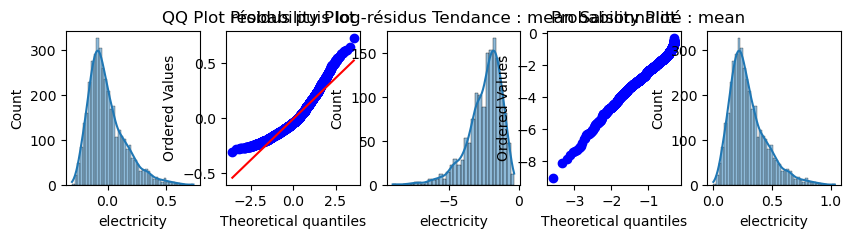

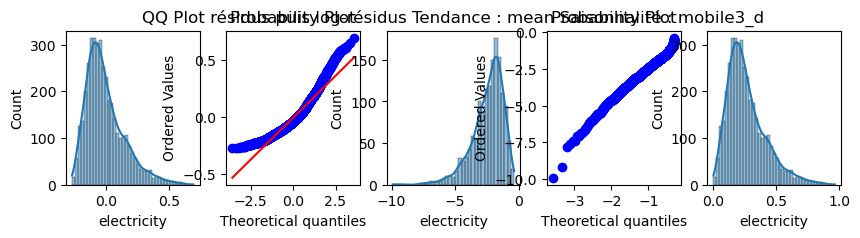

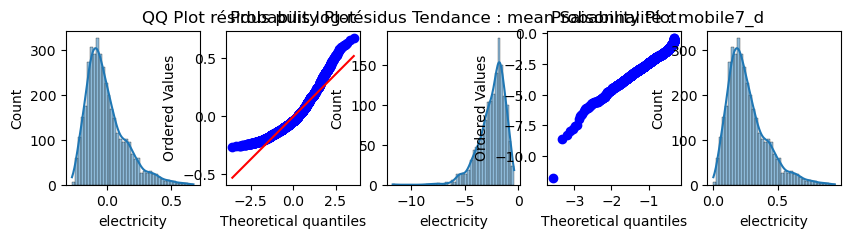

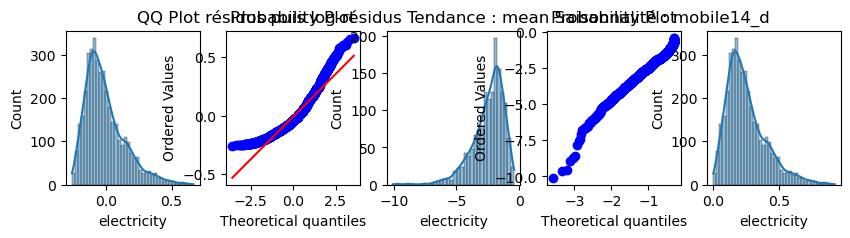

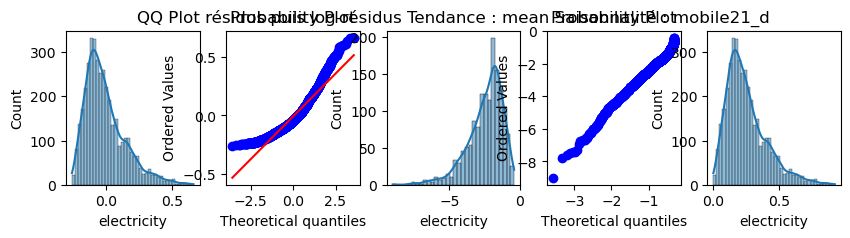

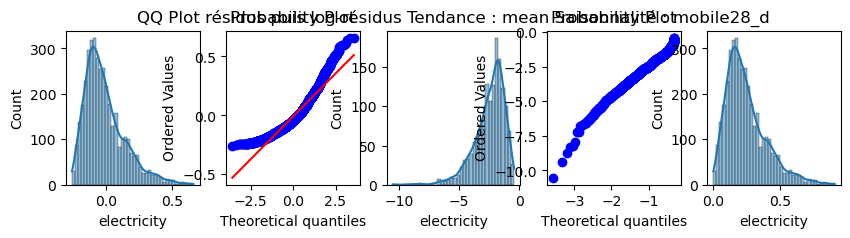

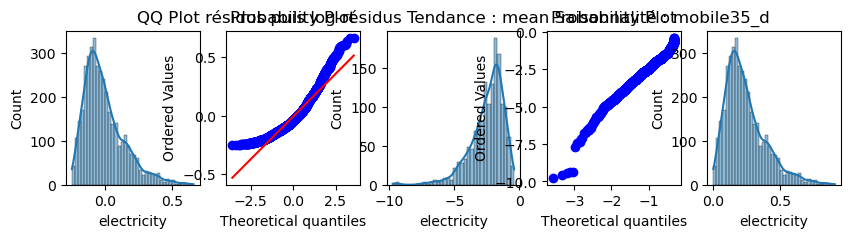

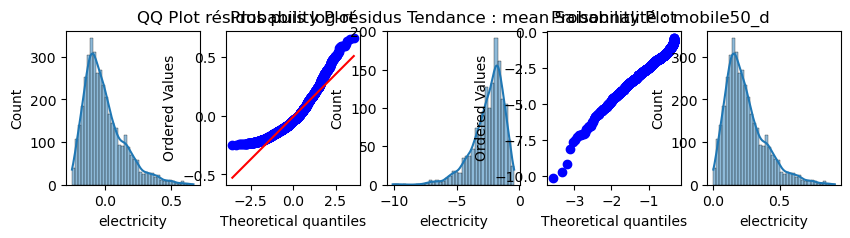

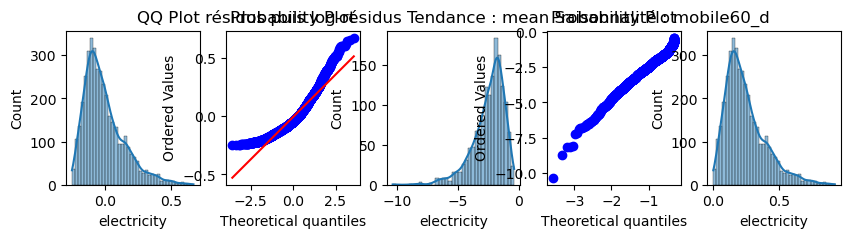

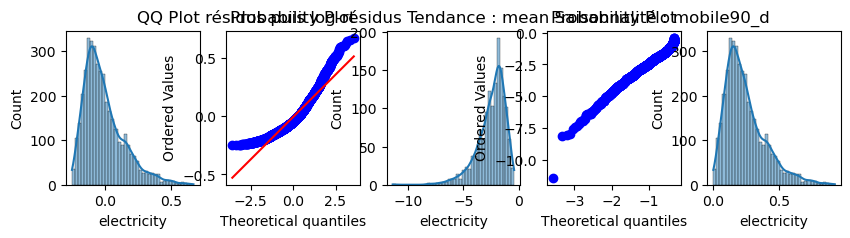

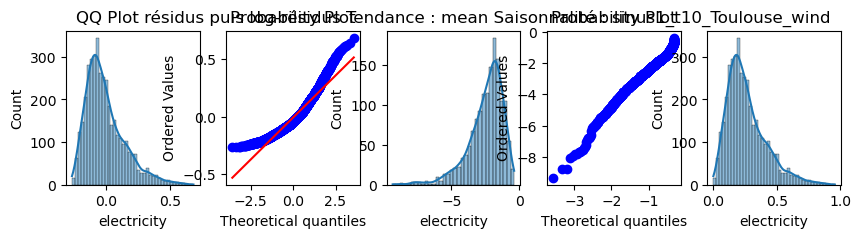

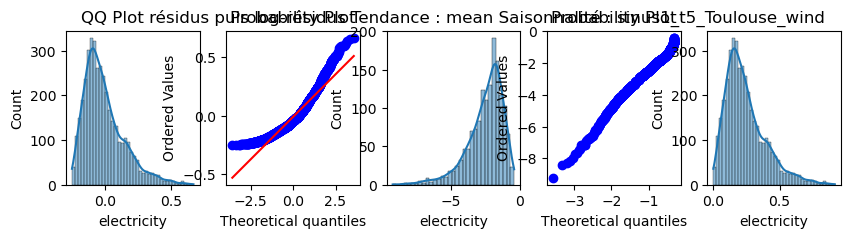

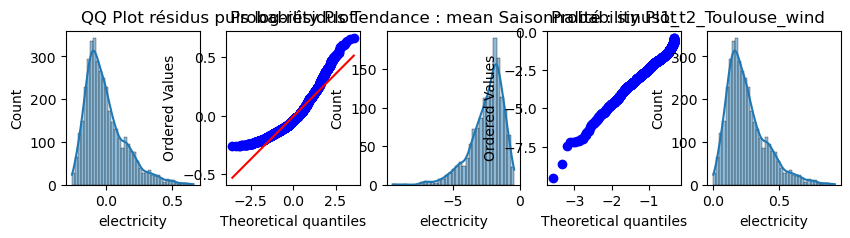

          mean mobile3_d mobile7_d mobile14_d mobile21_d mobile28_d  \
mean  0.121535  0.120434  0.119833   0.119526    0.11927   0.119223   

     mobile35_d mobile50_d mobile60_d mobile90_d sinus1_t10_Toulouse_wind  \
mean    0.11923   0.119176   0.119215   0.119427                 0.119893   

     sinus1_t5_Toulouse_wind sinus1_t2_Toulouse_wind  
mean                0.119174                0.119447  


In [10]:
from methodes_etude_serie import choix_tendance_saisonnalite

'''
'mean' : valeur moyenne sur la série (tendance si on suppose la série stationnaire) (valeur par défaut)
        'mobileI_d' : moyenne mobile sur I jours pour calculer la tendance
        Expl : pour la moyenne mobile sur 30 jours, entrer 'mobile30_d'

    Paramètre methode_saison : choix de la méthode pour calculer la saisonnalite
        'mobileI_d' : moyenne mobile sur I jours de la valeur moyenne sur chaque jour de l'année
        Expl : 'mobile28_d' : moyenne mobile sur 28 jours de la valeur moyenne par jour (valeur par défaut)
        
        'mean' : valeur moyenne sur chaque jour de l'année, sans moyenne mobile
        'sinus1_t10' : Calcul du sinus d'interpolation de la saisonnalité sur la valeur moyenne
'''

tendance_list = ['mean']

saisonnalite_list = ['mean', 'mobile3_d', 'mobile7_d', 'mobile14_d', 'mobile21_d', 'mobile28_d', 'mobile35_d', 'mobile50_d',
                     'mobile60_d', 'mobile90_d', 'sinus1_t10_Toulouse_wind', 'sinus1_t5_Toulouse_wind', 'sinus1_t2_Toulouse_wind']

mae = choix_tendance_saisonnalite(data_dToulouse_wind, tendance_list, saisonnalite_list)

print(mae)

## 2- Arma and Arimax modelisation

### 2-1 Arma modelisation

C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA paramete

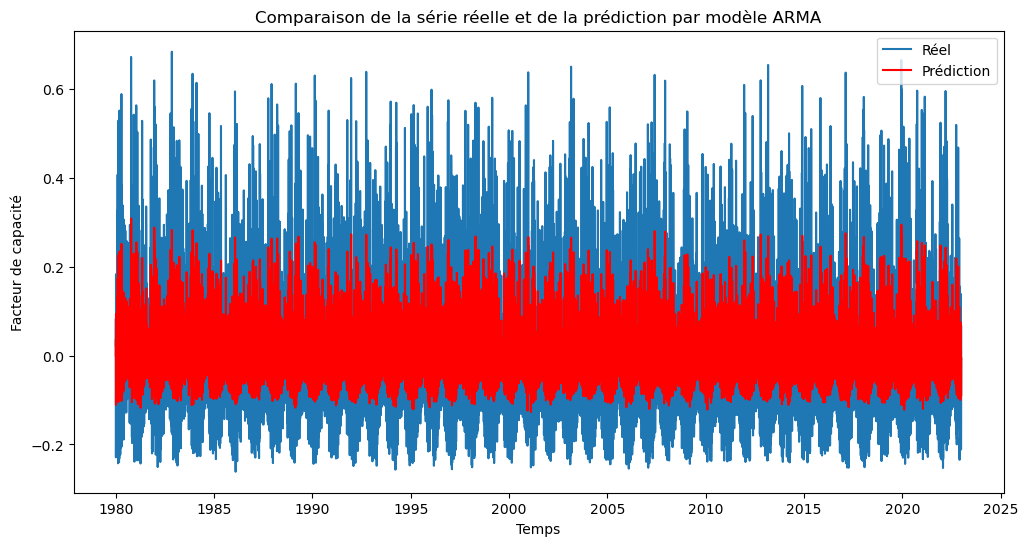

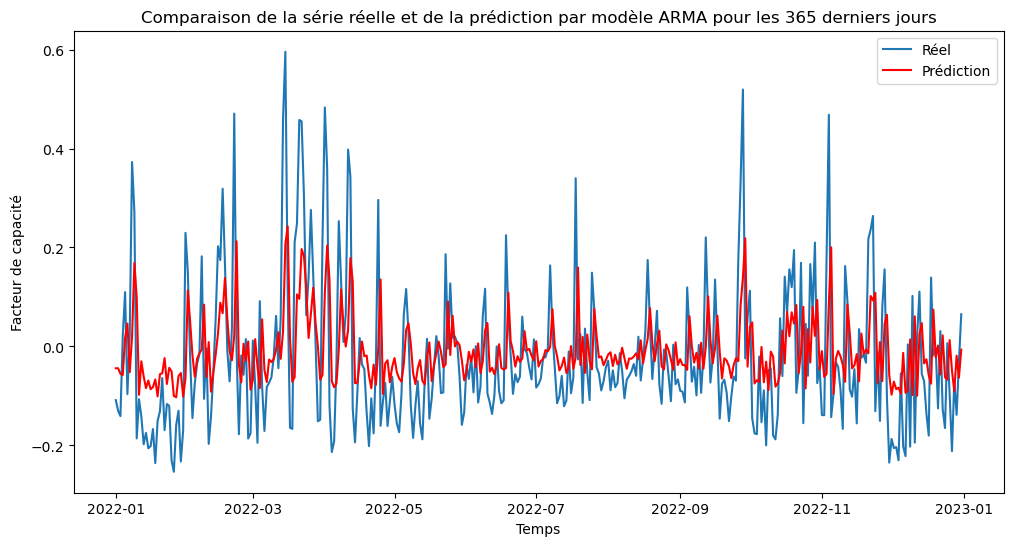

C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


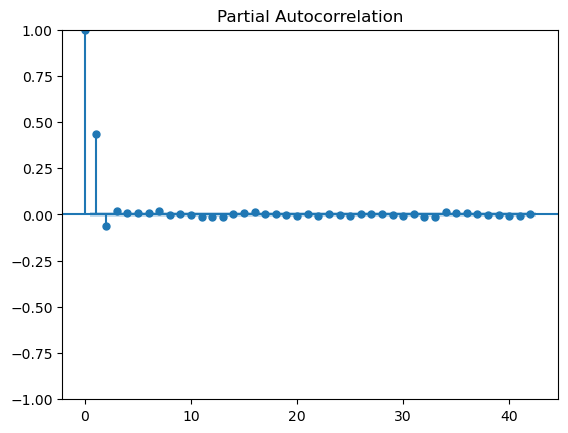

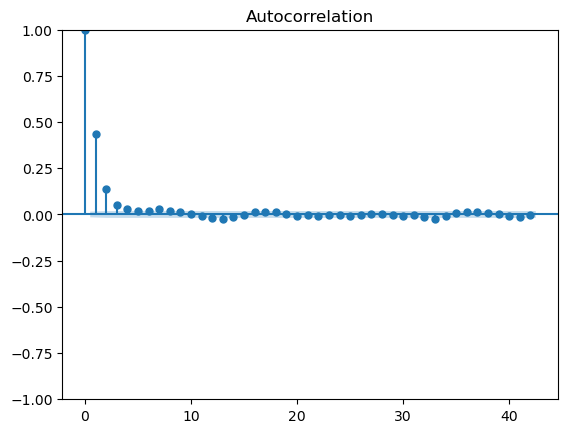

MSE: 0.01699815923999273
MAE: 0.10032476010408097
RMSE: 0.13037698892056346
R²: 0.20238569753458424


In [11]:
from methodes_etude_serie import Arma_predict

p=3
q=3
predict=Arma_predict(data_stationnary['electricity'],p,q,graph_predict=True,graph_predict_last_year=True,graph_autocorrelation=True,error=True)


### 2-2 Arimax modelisation

In [12]:
data_dToulouse_wind.loc['2000-01-01':'2022-12-31', ['electricity']]
# Fusionner les deux DataFrames sur l'index temporel
df_merged = pd.merge(data_stationnary, data_dToulouse_weather, left_index=True, right_index=True)

# Vérifiez que la fusion s'est bien passée
print(df_merged.head())

# Sélectionner les variables exogènes spécifiques et la variable cible
variables_exogenes = ['wind_speed', 'prectotland', 'cldtot', 'swgdn']
df_for_arimax = df_merged[['electricity'] + variables_exogenes]

print(df_for_arimax)

            electricity  wind_speed       t2m  prectotland  precsnoland  \
time                                                                      
2000-01-01    -0.184593    3.991417  6.737042     0.042500     0.000000   
2000-01-02    -0.211278    3.564625  5.965833     0.003792     0.000083   
2000-01-03    -0.099264    5.238458  5.200500     0.000000     0.000000   
2000-01-04    -0.219567    3.373417  6.232792     0.002417     0.000000   
2000-01-05    -0.126986    4.738583  6.539917     0.001000     0.000000   

              snomas      rhoa      swgdn       swtdn    cldtot  
time                                                             
2000-01-01  0.003958  1.242750  38.081375  133.232833  0.776667  
2000-01-02  0.002375  1.245000  51.991000  133.868292  0.751958  
2000-01-03  0.001458  1.245375  88.566000  134.533792  0.190292  
2000-01-04  0.000500  1.241250  76.269708  135.276458  0.722792  
2000-01-05  0.000000  1.229042  58.826917  136.074958  0.919750  
            

            electricity  wind_speed  prectotland    cldtot      swgdn
time                                                                 
2000-01-01    -0.184593    3.991417     0.042500  0.776667  38.081375
2000-01-02    -0.211278    3.564625     0.003792  0.751958  51.991000
2000-01-03    -0.099264    5.238458     0.000000  0.190292  88.566000
2000-01-04    -0.219567    3.373417     0.002417  0.722792  76.269708
2000-01-05    -0.126986    4.738583     0.001000  0.919750  58.826917
...                 ...         ...          ...       ...        ...
2022-12-27    -0.211556    3.419708     0.029125  0.476000  53.925167
2022-12-28    -0.069594    5.531250     0.003042  0.249167  85.334375
2022-12-29    -0.138194    4.708875     0.198375  0.867625  36.109333
2022-12-30    -0.031062    5.910375     0.016750  0.965667  50.787625
2022-12-31     0.065245    6.700375     0.000792  0.517208  80.737250

[8401 rows x 5 columns]
            wind_speed  prectotland    cldtot     swgdn
time     

C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


time
2018-11-23   -0.153894
2018-11-24   -0.074464
2018-11-25    0.121522
2018-11-26    0.067074
2018-11-27   -0.105299
                ...   
2022-12-27   -0.211556
2022-12-28   -0.069594
2022-12-29   -0.138194
2022-12-30   -0.031062
2022-12-31    0.065245
Name: electricity, Length: 1500, dtype: float64


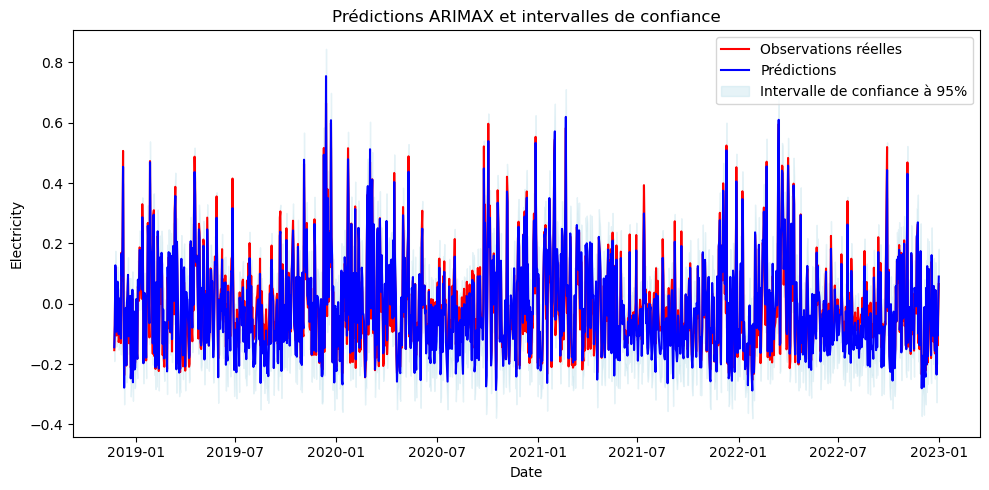

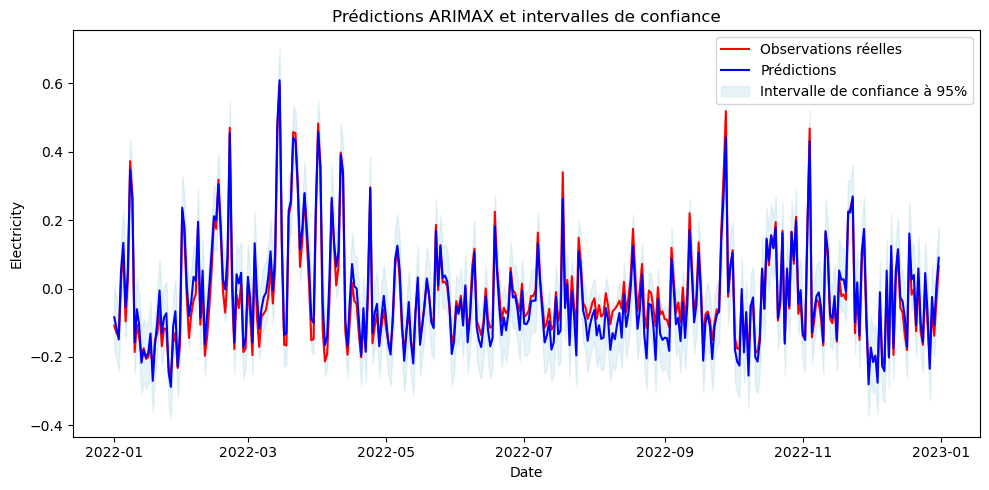

MSE: 0.001393841728993905
MAE: 0.030810643911812322
RMSE: 0.03733418981301061
R²: 0.9387000233339861


In [13]:
from methodes_etude_serie import Arimax_predict

print(df_for_arimax)

p=1
q=3

pred=Arimax_predict(df_for_arimax, 'electricity', p, q, day_exog=0, int_conf=True, int_conf_1y=True, error=True, len_test=1500, normalisation=True)


In [14]:
#Voir problèmes de dates !!!!!!!!
print(pred)





#predicted_means = pred.predicted_mean
#print(predicted_means)
#predicted_means=predicted_means.to_frame()
#predicted_means.columns=['electricity']

2018-11-23   -0.144209
2018-11-24   -0.070472
2018-11-25    0.127275
2018-11-26    0.053086
2018-11-27   -0.092982
                ...   
2022-12-27   -0.234737
2022-12-28   -0.024716
2022-12-29   -0.106394
2022-12-30    0.010188
2022-12-31    0.090118
Freq: D, Name: predicted_mean, Length: 1500, dtype: float64


In [15]:
# Affichage des résidus

from methodes_etude_serie import Ajout_Tendance_Saisonnalite

#data_reconstruct = Ajout_Tendance_Saisonnalite(pred, tendency_Toulouse_wind, seasonnality_Toulouse_wind28)

#print(data_reconstruct)

#plt.plot(data_reconstruct,alpha=0.5)
#plt.plot(data_dToulouse_wind['electricity'],alpha=0.5)

## 2-3 Arimax avec la précision des prévisions météo

### 2-3-1 Arimax avec seulement le vent

In [16]:
data_dToulouse_wind.loc['2000-01-01':'2022-12-31', ['electricity']]
# Fusionner les deux DataFrames sur l'index temporel
df_merged = pd.merge(data_stationnary, data_dToulouse_weather, left_index=True, right_index=True)

# Vérifiez que la fusion s'est bien passée
print(df_merged.head())

# Sélectionner les variables exogènes spécifiques et la variable cible
variables_exogenes = ['wind_speed']
df_for_arimax = df_merged[['electricity'] + variables_exogenes]

print(df_for_arimax)

            electricity  wind_speed       t2m  prectotland  precsnoland  \
time                                                                      
2000-01-01    -0.184593    3.991417  6.737042     0.042500     0.000000   
2000-01-02    -0.211278    3.564625  5.965833     0.003792     0.000083   
2000-01-03    -0.099264    5.238458  5.200500     0.000000     0.000000   
2000-01-04    -0.219567    3.373417  6.232792     0.002417     0.000000   
2000-01-05    -0.126986    4.738583  6.539917     0.001000     0.000000   

              snomas      rhoa      swgdn       swtdn    cldtot  
time                                                             
2000-01-01  0.003958  1.242750  38.081375  133.232833  0.776667  
2000-01-02  0.002375  1.245000  51.991000  133.868292  0.751958  
2000-01-03  0.001458  1.245375  88.566000  134.533792  0.190292  
2000-01-04  0.000500  1.241250  76.269708  135.276458  0.722792  
2000-01-05  0.000000  1.229042  58.826917  136.074958  0.919750  
            

            electricity  wind_speed
time                               
2000-01-01    -0.184593    3.991417
2000-01-02    -0.211278    3.564625
2000-01-03    -0.099264    5.238458
2000-01-04    -0.219567    3.373417
2000-01-05    -0.126986    4.738583
...                 ...         ...
2022-12-27    -0.211556    3.419708
2022-12-28    -0.069594    5.531250
2022-12-29    -0.138194    4.708875
2022-12-30    -0.031062    5.910375
2022-12-31     0.065245    6.700375

[8401 rows x 2 columns]
            wind_speed
time                  
2000-01-01   -1.095032
2000-01-02   -1.370740
2000-01-03   -0.289439
2000-01-04   -1.494262
2000-01-05   -0.612360
...                ...
2022-12-27   -1.464357
2022-12-28   -0.100294
2022-12-29   -0.631551
2022-12-30    0.144622
2022-12-31    0.654964

[8401 rows x 1 columns]


C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


time
2018-11-23   -0.153894
2018-11-24   -0.074464
2018-11-25    0.121522
2018-11-26    0.067074
2018-11-27   -0.105299
                ...   
2022-12-27   -0.211556
2022-12-28   -0.069594
2022-12-29   -0.138194
2022-12-30   -0.031062
2022-12-31    0.065245
Name: electricity, Length: 1500, dtype: float64


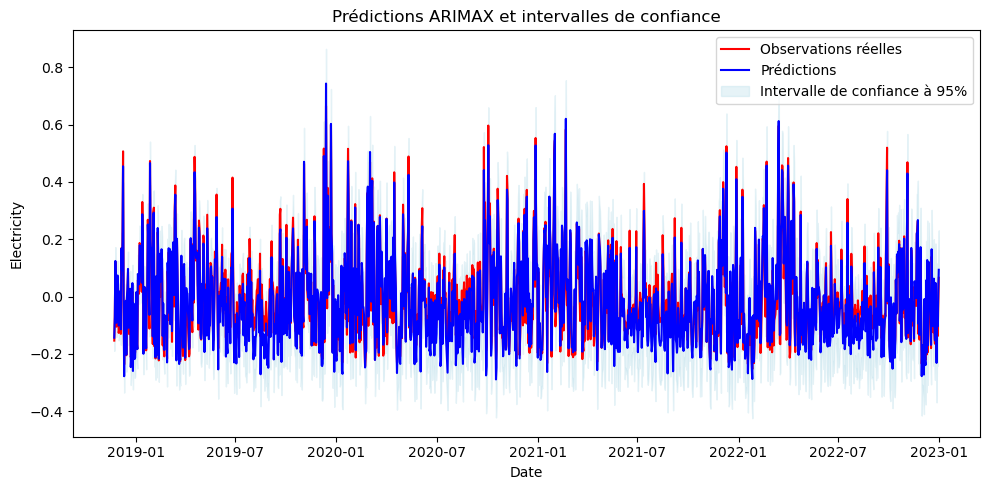

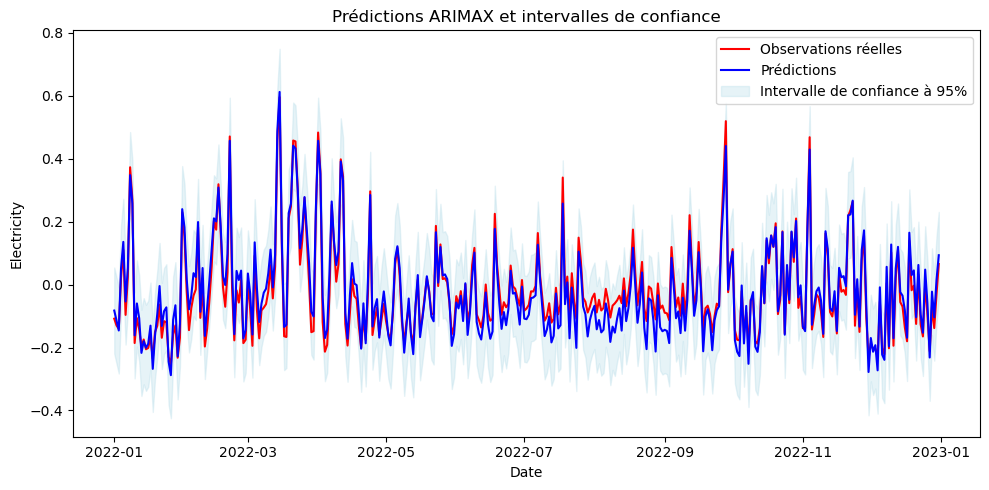

MSE: 0.0015356311599487025
MAE: 0.03229944485251051
RMSE: 0.03918713002949696
R²: 0.9324642444587975


In [17]:
from methodes_etude_serie import Arimax_predict

print(df_for_arimax)

p=1
q=3

pred=Arimax_predict(df_for_arimax, 'electricity', p, q, day_exog=0, int_conf=True, int_conf_1y=True, error=True, len_test=1500, normalisation=True)


### 2-3-2 Calcul de l'erreur sur les prévisions de vent

[ 0.24288668 -0.0313531  -0.22132844 ...  0.39862245  0.40788031
  0.02221714]


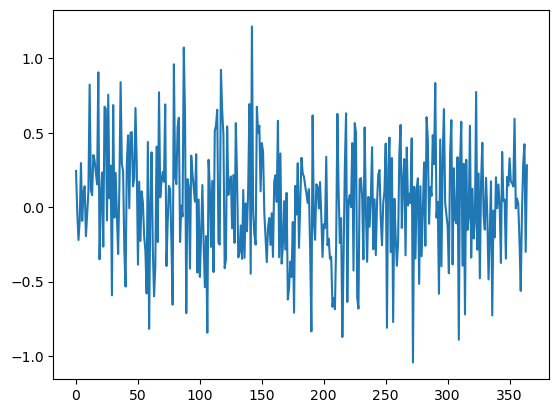

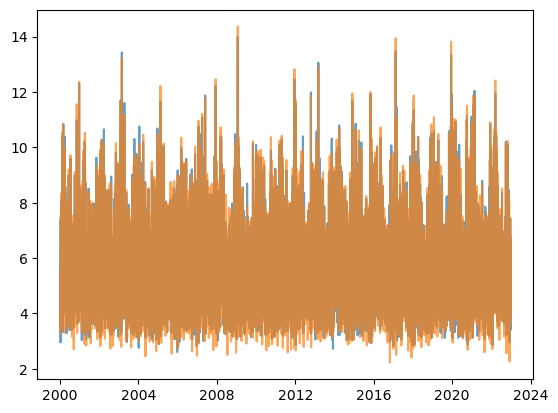

In [18]:
#MAE de 1.8m/s par heure
#On suppose que l'erreur à chaque heure est indépendante
#Donc variance de 24*1.8²/24=1.8², donc écart type = 1.8/racine(24)  = 0.368

mae = 0.368

bruit_gaussien = np.random.normal(loc=0, scale=mae, size=len(df_for_arimax['wind_speed']))

print(bruit_gaussien)

plt.plot(bruit_gaussien[:365])
plt.show()

df_meteo = df_for_arimax.copy()

df_meteo['wind_speed'] = df_meteo['wind_speed'] + bruit_gaussien

#A ajouter : mettre à 0 les valeurs de vent négatives


plt.plot(df_for_arimax['wind_speed'], alpha=0.7)
plt.plot(df_meteo['wind_speed'], alpha=0.7)
plt.show()

            wind_speed
time                  
2000-01-01   -0.915547
2000-01-02   -1.357228
2000-01-03   -0.422332
2000-01-04   -1.513310
2000-01-05   -0.411302
...                ...
2022-12-27   -1.184303
2022-12-28   -0.024465
2022-12-29   -0.365397
2022-12-30    0.397434
2022-12-31    0.652183

[8401 rows x 1 columns]


C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


time
2018-11-23   -0.153894
2018-11-24   -0.074464
2018-11-25    0.121522
2018-11-26    0.067074
2018-11-27   -0.105299
                ...   
2022-12-27   -0.211556
2022-12-28   -0.069594
2022-12-29   -0.138194
2022-12-30   -0.031062
2022-12-31    0.065245
Name: electricity, Length: 1500, dtype: float64


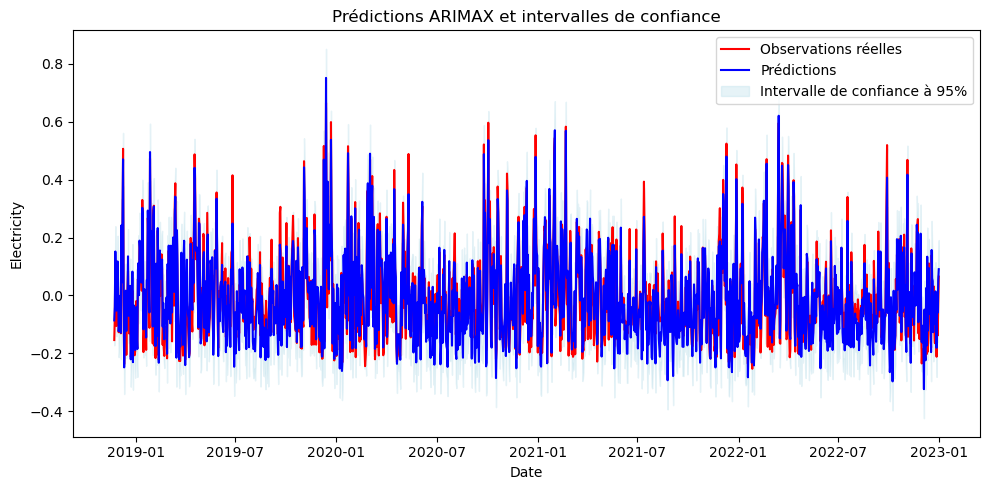

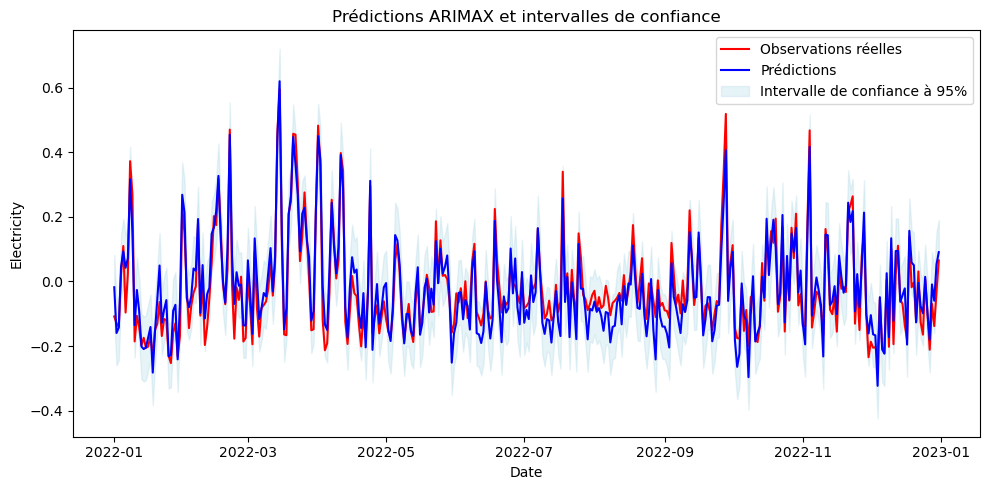

MSE: 0.0026656615807696075
MAE: 0.04224461304626911
RMSE: 0.05163004532992013
R²: 0.8827664653011825


In [19]:
from methodes_etude_serie import Arimax_predict


p=1
q=3

pred=Arimax_predict(df_meteo, 'electricity', p, q, day_exog=0, int_conf=True, int_conf_1y=True, error=True, len_test=1500, normalisation=True)
